In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [59]:
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime,timezone
from dateutil.tz import gettz

connection = psycopg2.connect(
            host="aliyun-medbot.rwlb.rds.aliyuncs.com",
            database="beijing3th-jingzhou-timedelay-logs",
            user="yuzt_mysql",
            password="Medbot8848",
            port="5432"  # 默认是5432，如果使用默认可以省略
        )
print (connection)

<connection object at 0x000001E8DF241948; dsn: 'user=yuzt_mysql password=xxx dbname=beijing3th-jingzhou-timedelay-logs host=aliyun-medbot.rwlb.rds.aliyuncs.com port=5432', closed: 0>


In [60]:
x_list=[]
y_list=[]
sizes=2

cursor = connection.cursor()
cursor.execute("SELECT version();") # 查询PostgreSQL版本
sql_version = cursor.fetchone()
print(sql_version)
local_tz = gettz('Asia/Shanghai')  # 获取上海时区，代表东八区
cursor.execute("SELECT * FROM _2024_05_15_networkrecord_log ORDER BY timestamp ASC LIMIT 1;")
timeResults=cursor.fetchall()
print(timeResults)
for time in timeResults:
    print(time[0].timestamp())
    print(time[0],type(time[0]))
    local_dt = datetime.fromtimestamp(time[0].timestamp(),local_tz).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]# 最后[:-3]是为了去掉多余的微秒部分，只保留毫秒
    print(local_dt,type(local_dt))
    date_object = datetime.strptime(local_dt, '%Y-%m-%d %H:%M:%S.%f')
    print(date_object,type(date_object))
   
cursor.execute("SELECT * FROM _2024_05_15_networkrecord_log ORDER BY timestamp ASC;")
timeResults=cursor.fetchall()
for time in timeResults:
    local_dt = datetime.fromtimestamp(time[0].timestamp(),local_tz).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
    date_object = datetime.strptime(local_dt, '%Y-%m-%d %H:%M:%S.%f')
    
    x_list.append(date_object) #这个是正确的方式
    #x_list.append(time[0])#这个是错误的方式。
    y_list.append(time[1])


('PostgreSQL 14.11',)
[(datetime.datetime(2024, 5, 15, 8, 16, 56, 155000, tzinfo=datetime.timezone(datetime.timedelta(seconds=28800))), Decimal('24'))]
1715732216.155
2024-05-15 08:16:56.155000+08:00 <class 'datetime.datetime'>
2024-05-15 08:16:56.155 <class 'str'>
2024-05-15 08:16:56.155000 <class 'datetime.datetime'>


2024-05-15 08:16:56.155000 <class 'datetime.datetime'>


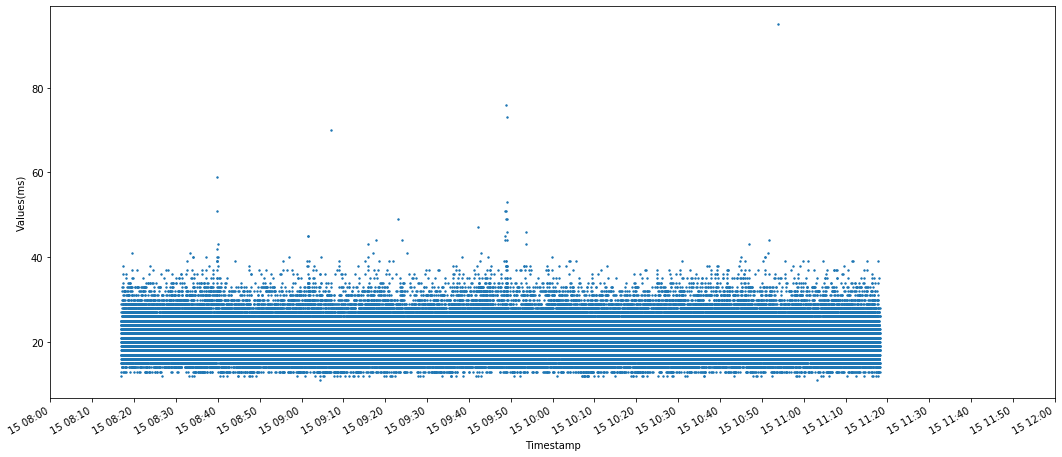

In [61]:
print(x_list[0], type(x_list[0]))
# 设置横轴为日期格式 '%Y-%m-%d %H:%M:%S:%f %Z'
fig=plt.figure(figsize=(18, 8))
ax=fig.add_subplot(111)
ax.set_xlim([datetime(2024,5,15,8), datetime(2024,5,15,12)])
# 旋转日期标签，避免重叠
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Values(ms)')

plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(byminute=range(0,60,10)))#每10分钟标记一次


plt.scatter(x_list,y_list,s=sizes)
plt.show()